<a href="https://colab.research.google.com/github/TomatoBomb/open/blob/main/%E3%80%90%CE%B2%E3%80%91%E7%94%BB%E5%83%8F%E8%AA%8D%E8%AD%98%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 畳み込みによる画像認識

In [1]:
##少し時間を要する
#pyTorchのインポート
import torch
#学習済みのモデルをインポート
from torchvision import models
#データ変換のためのモジュールをインポート
from torchvision import transforms
#前処理用
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])
#101層のResNetを使用
resnet = models.resnet101(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 119MB/s]


## 操作①
imagenet.txtの取り込み(githubからダウンロード可能　※既に取り込まれている場合必要なし)

In [2]:
from google.colab import files
uploaded_file = files.upload()

Saving imagenet.txt to imagenet.txt


In [3]:
#画像識別後のラベルを読みこむ
with open('imagenet.txt') as f:
  labels = [line.strip() for line in f.readlines()]

## 操作②
任意の画像を取り込む。（githubからダウンロード可能）

In [5]:
#画像の取り込み
from google.colab import files
uploaded_file = files.upload()

Saving cat.jpg to cat.jpg


### 任意変更のプログラム
ファイルの取り込み

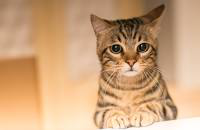

In [6]:
#画像修正のモジュール
from PIL import Image


#画像の取り込み（ファイル名を()の中に入れる)
img = Image.open("cat.jpg")
img

In [7]:
#画像データの前処理
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
#Resnetを推論モードにセットして実行
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [8]:
#ResNetで画像を処理して、結果を出力
out = resnet(batch_t)
_, index = torch.max(out, 1)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('tabby, tabby cat', 55.00074768066406)

In [9]:
#他のものと推定される割合
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('tabby, tabby cat', 55.00074768066406),
 ('tiger cat', 23.346220016479492),
 ('Egyptian cat', 20.010236740112305),
 ('tiger, Panthera tigris', 0.7848211526870728),
 ('lynx, catamount', 0.2563271224498749)]